<a href="https://colab.research.google.com/github/Linkonb/Mobile_Finance_Fraud_Detection/blob/main/Mobile_Finance_Fraud_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data_df['step'].count()

6362620

In [ ]:
data_df=data_df.dropna()
print(data_df['step'].count())
data_df.head(10)

6362620


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#Filter Data which is Fraud
#data= data.query('ComID == 7 and JoiningDate. >= '01-01-2015'' )

data = data_df.query('isFraud  == 1')

print(data['step'].count())

8213


In [ ]:
data.groupby(['nameDest'])['nameDest'].count()
da=data.groupby(['nameDest'])['nameDest'].count()
da.head()

nameDest
C1000039615    1
C1000367306    1
C1000407130    1
C1000836187    1
C1000855680    1
Name: nameDest, dtype: int64

<Axes: xlabel='nameDest'>

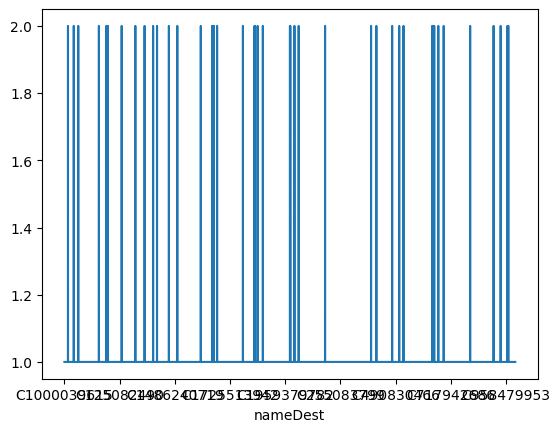

In [ ]:
data.groupby(['nameDest'])['nameDest'].count().plot(legend=False)
#plt.plot(data['nameDest'], data.groupby(['nameDest'])['nameDest'].count() )
#plt.show()

In [ ]:
data_2=data_df[data_df['nameDest'].isin( data['nameDest'] )]
data_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65648 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            65648 non-null  int64  
 1   type            65648 non-null  object 
 2   amount          65648 non-null  float64
 3   nameOrig        65648 non-null  object 
 4   oldbalanceOrg   65648 non-null  float64
 5   newbalanceOrig  65648 non-null  float64
 6   nameDest        65648 non-null  object 
 7   oldbalanceDest  65648 non-null  float64
 8   newbalanceDest  65648 non-null  float64
 9   isFraud         65648 non-null  int64  
 10  isFlaggedFraud  65648 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 6.0+ MB


In [ ]:
data_2.head(20)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
191,1,CASH_OUT,55105.90,C2007486296,0.00,0.00,C932583850,317952.89,2719172.89,0,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
381,1,TRANSFER,324397.94,C1648700617,0.00,0.00,C932583850,373058.79,2719172.89,0,0
467,1,CASH_IN,57809.81,C635610193,3434765.61,3492575.42,C1454031203,59666.00,0.00,0,0
516,1,TRANSFER,7206.33,C478139423,24932.00,17725.67,C1032986144,21308.00,18161.79,0,0
644,1,CASH_IN,1271.77,C173738886,6973823.50,6975095.27,C932583850,697456.73,2719172.89,0,0


<Axes: xlabel='nameDest'>

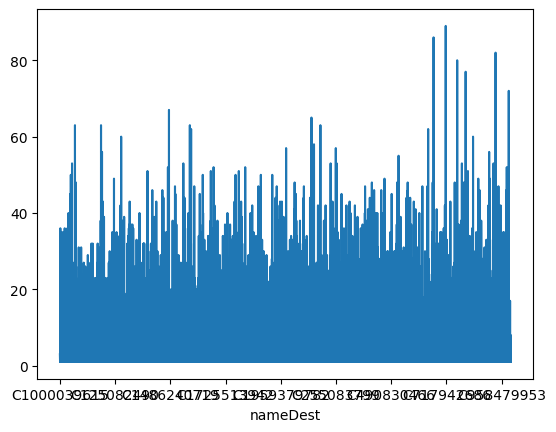

In [ ]:
data_2.groupby(['nameDest'])['nameDest'].count().plot(legend=False)

In [ ]:
data_2.groupby(['nameDest'])['nameDest'].count().sort_values(ascending=False).head(1000)

#data_2.groupby('nameDest').agg(total=('nameDest', 'count'))


nameDest
C716083600     89
C667346055     86
C932583850     82
C766681183     80
C803116137     77
               ..
C1718370785    19
C1811125343    19
C1709297334    19
C1822662997    19
C1410772005    19
Name: nameDest, Length: 1000, dtype: int64

In [ ]:
data_2.groupby(['isFraud'])['nameDest'].count().sort_values(ascending=False).head(1000)

isFraud
0    57435
1     8213
Name: nameDest, dtype: int64

In [ ]:
data_Max=data_2.query('nameDest  == "C1410772005"')
data_Max.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
822422,40,TRANSFER,244315.55,C383100579,16091.00,0.00,C1410772005,0.00,244315.55,0,0
896410,42,CASH_OUT,179386.20,C137370056,114338.59,0.00,C1410772005,244315.55,423701.75,0,0
1050318,95,CASH_OUT,255996.77,C525893460,0.00,0.00,C1410772005,423701.75,679698.52,0,0
1069757,122,CASH_OUT,990857.53,C46599562,990857.53,0.00,C1410772005,679698.52,1670556.05,1,0
1194507,132,CASH_OUT,234834.35,C2114841919,0.00,0.00,C1410772005,1670556.05,1456403.62,0,0
1196991,132,CASH_IN,448986.77,C1327768853,9412477.08,9861463.86,C1410772005,1905390.40,1456403.62,0,0
1347004,137,DEBIT,5718.36,C1948932573,247281.00,241562.64,C1410772005,1456403.62,1462121.98,0,0
1391792,139,CASH_IN,187704.30,C867339484,4437235.31,4624939.61,C1410772005,1462121.98,1274417.68,0,0
1580451,155,CASH_OUT,324590.05,C1461154580,0.00,0.00,C1410772005,1274417.68,1599007.73,0,0
1713490,160,CASH_OUT,32325.42,C385597689,0.00,0.00,C1410772005,1599007.73,1631333.14,0,0


In [ ]:
data_Max=data_Max.query('isFraud == 1')
data_Max.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.0,0.0,C667346055,102.0,9291619.62,1,0


In [ ]:
data_2=data_df[data_df['nameOrig'].isin( data['nameDest'] )]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 343013 to 6150837
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            18 non-null     int64  
 1   type            18 non-null     object 
 2   amount          18 non-null     float64
 3   nameOrig        18 non-null     object 
 4   oldbalanceOrg   18 non-null     float64
 5   newbalanceOrig  18 non-null     float64
 6   nameDest        18 non-null     object 
 7   oldbalanceDest  18 non-null     float64
 8   newbalanceDest  18 non-null     float64
 9   isFraud         18 non-null     int64  
 10  isFlaggedFraud  18 non-null     int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ KB


In [ ]:
data_df['SnameOrig']=data_df['nameOrig'].str[0:1]

In [ ]:
data_df['SnameOrig'].head(10)

0    C
1    C
2    C
3    C
4    C
5    C
6    C
7    C
8    C
9    C
Name: SnameOrig, dtype: object

In [ ]:
data_df['SnameDest']=data_df['nameDest'].str[0:1]

In [ ]:
data_df['SnameDest'].head(10)

0    M
1    M
2    C
3    C
4    M
5    M
6    M
7    M
8    M
9    C
Name: SnameDest, dtype: object

In [ ]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,M


In [ ]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()


In [ ]:
data_df['type'] = lableencoder_X_2.fit_transform(data_df['type'])
data_df['nameOrig'] = lableencoder_X_2.fit_transform(data_df['nameOrig'])
data_df['nameDest'] = lableencoder_X_2.fit_transform(data_df['nameDest'])
data_df['SnameOrig'] = lableencoder_X_2.fit_transform(data_df['SnameOrig'])
data_df['SnameDest'] = lableencoder_X_2.fit_transform(data_df['SnameDest'])

In [ ]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X=data_df[['step','type','amount','nameOrig','nameDest','SnameOrig','SnameDest']]
Y=data_df[['isFraud']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.count()
X_test.count()

step         1908786
type         1908786
amount       1908786
nameOrig     1908786
nameDest     1908786
SnameOrig    1908786
SnameDest    1908786
dtype: int64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1,
             min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [ ]:
model = clf.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9985084760680348


In [ ]:
print(predicted)

[0 0 0 ... 0 0 0]


In [ ]:
X=data_df[['step','type','amount','nameOrig','nameDest']]
Y=data_df[['isFraud']]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1,
             min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

model_2 = clf.fit(X_train, y_train)

predicted = model_2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9987196050264409
